In [1]:
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the path to your ZIP file and extraction directory
zip_path = './images.zip'  # Adjust the path if needed
extract_path = './images'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extraction
print(os.listdir(extract_path))

['.ipynb_checkpoints', 'girl.png', 'cartoon.bmp', 'girl_y.jpg', 'cartoon_y.jpg', 'fingerprint.jpg', 'fingerprint_y.jpg', '.DS_Store']


In [3]:
# Load the images
cartoon = cv2.imread('./images/cartoon.bmp')
cartoon_y = cv2.imread('./images/cartoon_y.jpg')
girl = cv2.imread('./images/girl.png')  # Load as grayscale
girl_y = cv2.imread('./images/girl_y.jpg')
fingerprint = cv2.imread('./images/fingerprint.jpg')
fingerprint_y = cv2.imread('./images/fingerprint_y.jpg')


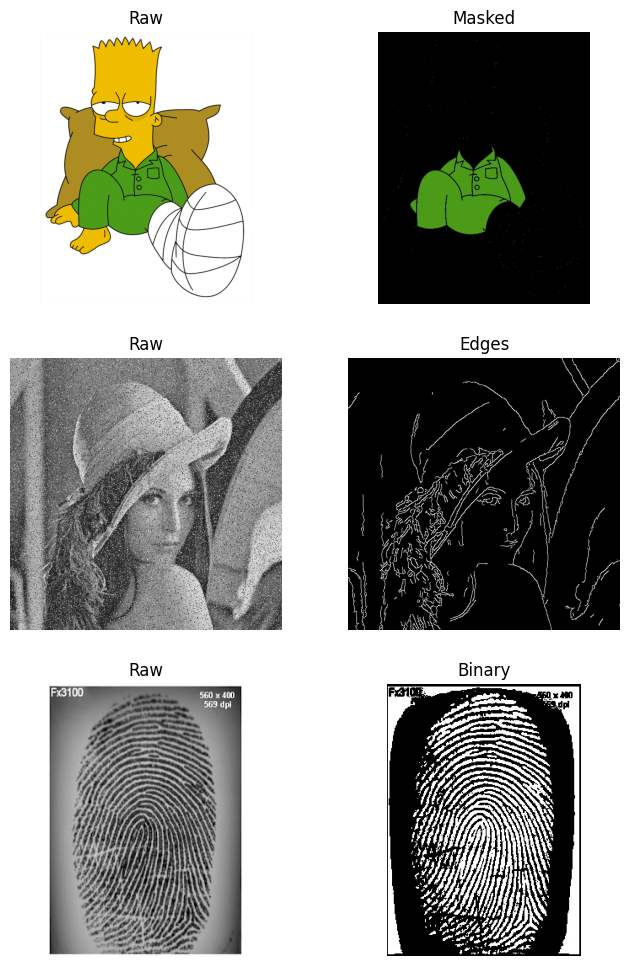

In [4]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

In [5]:
# Convert the image to HSV color space
cartoon_hsv = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)

# Define color range for the dress (green color)
lower_color = np.array([35, 100, 100])
upper_color = np.array([85, 255, 255])

# Create a mask for the dress color
mask = cv2.inRange(cartoon_hsv, lower_color, upper_color)

# Use the mask to isolate the dress
dress_masked = cv2.bitwise_and(cartoon, cartoon, mask=mask)

# Convert the result back to RGB for displaying with matplotlib
cartoon_y_mentee = cv2.cvtColor(dress_masked, cv2.COLOR_BGR2RGB)

In [6]:
# Girl image processing (reduce noise in edge detection)
# Apply Median blur to reduce noise while preserving edges
girl_blurred = cv2.medianBlur(girl, 5)
# Use Canny edge detection with adjusted thresholds
girl_y_mentee = cv2.Canny(girl_blurred, 100, 200)

In [7]:
# Fingerprint image processing (convert to binary image)
fingerprint_gray = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)
_, fingerprint_y_mentee = cv2.threshold(fingerprint_gray, 128, 255, cv2.THRESH_BINARY)


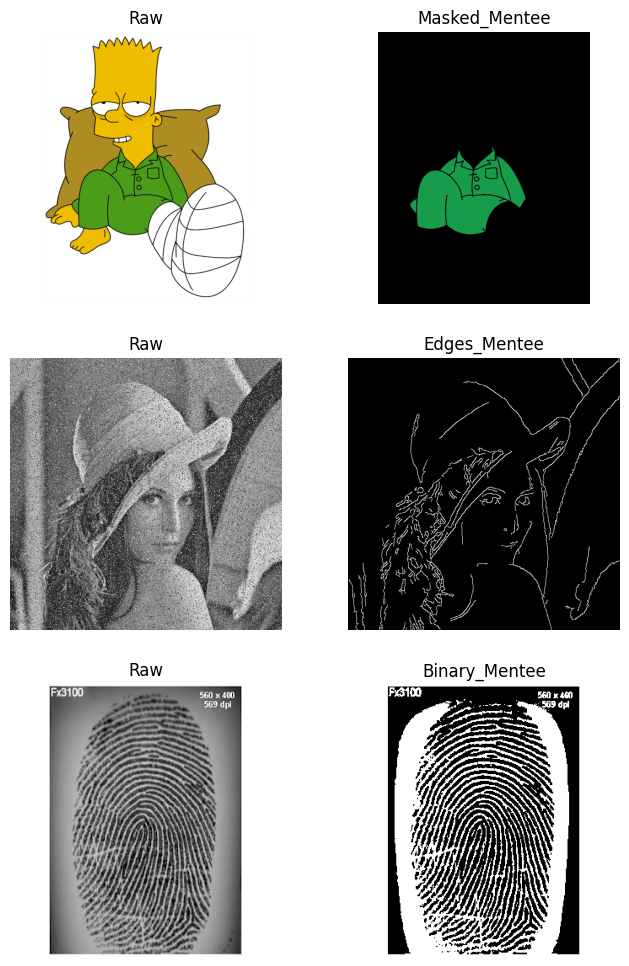

In [8]:
# Visualization
fig, axs = plt.subplots(3, 2, figsize=(8, 12))
axs[0, 0].imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))
axs[0, 0].axis("off")
axs[0, 0].set_title("Raw")
axs[0, 1].imshow(cv2.cvtColor(cartoon_y_mentee, cv2.COLOR_BGR2RGB))
axs[0, 1].axis("off")
axs[0, 1].set_title("Masked_Mentee")
axs[1, 0].imshow(girl, cmap='gray')
axs[1, 0].axis("off")
axs[1, 0].set_title("Raw")
axs[1, 1].imshow(girl_y_mentee, cmap='gray')
axs[1, 1].axis("off")
axs[1, 1].set_title("Edges_Mentee")
axs[2, 0].imshow(fingerprint, cmap='gray')
axs[2, 0].axis("off")
axs[2, 0].set_title("Raw")
axs[2, 1].imshow(fingerprint_y_mentee, cmap='gray')
axs[2, 1].axis("off")
axs[2, 1].set_title("Binary_Mentee")
plt.show()